<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/Rectificador_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación circuito rectificdor onda completa RC en Python

- Ver [modelado Circuito RC serie y paralelo](https://es.wikipedia.org/wiki/Circuito_RC)

Para circuito RC serie:

$V_c(s) =V_{in}(s) \frac{1}{RCs + 1}$

- Se reemplazará la entrada por aproximación numérica de una onda cosenoidal rectificada.

- Ver [rectificador onda completa](http://tutorialesdeelectronicabasica.blogspot.com/2019/08/teoria-de-rectificador-de-onda-completa.html)

Nota: en general se estudia el circuito RC paralelo en rectificadores. El ejercicio planteado en el Taller 2 del curso, cuyo objetivo principal el ilustrar los conceptos de la transformada de Fourier, plantea el estudio del circuito RC serie, por lo que se sugiere trabajar en términos de tensión.

- Para el caso RC paralelo se asume una fuente de corriente como entrada y la salida en tensión en el capacitor (ver última sección  [modelado Circuito RC serie y paralelo](https://es.wikipedia.org/wiki/Circuito_RC)):

$V_c(s) =I_{in}(s) \frac{R}{RCs + 1}$



In [1]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym 
sym.init_session() 
import scipy.signal as sig
import scipy.optimize as opt
from IPython.display import Image

IPython console for SymPy 1.7.1 (Python 3.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



# Modelo en Laplace circuito RC serie

# Funcion de transferencia

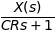

In [2]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

# Fijar valores de parámetros para simulación

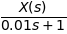

In [3]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

#Función de transferencia en scipy 

- Se resuelve la función de transferencia y se pasa al paquete scipy para trabajar con la aproximación numérica de la entrada, en este caso la función senoidal rectificada

- Par más información ver [Función de Transferencia scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html)

In [4]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)


[1]
[0.01 1.  ]


# Evaluar sistema ante entrada de interés y obtener salida en arreglo numpy

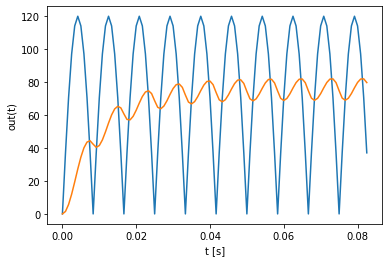

In [5]:
Fo = 60 #frec alimentacion
Fs = 20*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = numpy.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentacion con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_ = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)# 
#Para rectificador de media onda: 
rec_m = 0.5*(sig.square(2*numpy.pi*Fo*t)+1)
in_ = in_ * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numerica de scipy
plt.plot(t, in_,label='In(t)')
plt.plot(t, out,label='Out(t)')
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

#Cálculo del espectro con fft

Nota: Debe tener presente el valor de Fs y Fo para el análisis de los armónicos

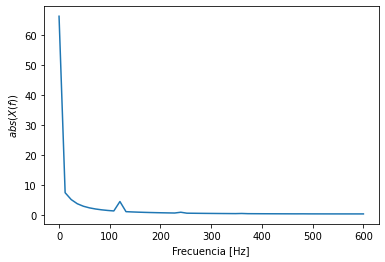

In [6]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$abs(X(f))$')
plt.show()

# Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy puede calcular el THD según el material de apoyo del taller